In [ ]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorboard as tb
from datetime import datetime


import keras
import tensorflow.keras as keras
from tensorflow.keras import layers, models, optimizers, losses, metrics, activations, initializers, regularizers, constraints
from keras.models import Sequential, Model as KModel
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.optimizers import Adam, SGD
from keras.datasets import mnist, cifar10, cifar100, fashion_mnist


import matplotlib.pyplot as plt
import seaborn as sns
import torch as th
from torch.utils.data import DataLoader, Dataset
from torch import nn


In [ ]:
# Activation functions
class Agregation:
    def Mean(x:list,w:list,b):
        y = []
        for i in range(len(x)):
            n = x[i]*w[i]
            y.append(n)
        z = np.sum(y) + b
        return z
# Activation functions
class Activation:
    def ReLu(x):
        y = max(0,x)
        return y
    def Sigmoid(x):
        y = 1/(1+np.exp(-x))
        return y
    def Softmax(x): 
        y = np.exp(x)/np.sum(np.exp(x))
        return y
    def Tanh(x):
        y = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
        return y
# Loss functions
class Loss:
    def MSE(y_true, y_pred):
        loss = np.mean((y_true-y_pred)**2)
        return loss
    def MAE(y_true, y_pred):
        loss = np.mean(np.abs(y_true-y_pred))
        return loss



The keras module is not an IPython extension.


In [32]:
import torch as th
from torch import nn
device = th.accelerator.current_accelerator().type if th.accelerator.is_available() else "cpu"
print(f"Using {device} device")
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )   

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NN().to(device)
print(model)

Using cpu device
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
class NN():
    def __init__(self,*layers):
        super(NN, self).__init__()
        self.layers = layers
    def Set_Test(self, x_train, y_train, x_test=None, y_test=None):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
    def Set_Train(self, epochs, batch_size):
        self.epochs = epochs
        self.batch_size = batch_size
    def Compile(self, activation, loss):
        self.act = activation
        self.loss = loss
        self.layers.compile(act=self.act,loss=self.loss)
    def Add(self, layer):
        self.model.add(layer)
        self.layers.append(layer)



                                 model
layers          [Input, Dense, Output]
dim         [[28, 28], [4, 4], [4, 4]]
activation          [relu, relu, soft]
loss                   [MSE, MSE, MSE]


In [ ]:
# Tensor
import numpy as np
import seaborn as sns
import pandas as pd

# Model{Unit_N{W[ints],B[int],Z[int]}}

class Tensor():
    def __init__(self, shape):
        self.shape = shape
        self.model = {}
        for i in range(int(self.shape)):
            unit = {'W':[], 'B':None, 'Z':None}
            unit['W'].append(np.random.randn(int(self.shape)).round(4))
            unit['B'] = np.random.randn(1).round(4)
            self.model[f'U_{i+1}'] = unit
        print(pd.DataFrame(self.model))

    def Print(self, unit, key):
        self.unit = unit
        self.key = key
        print(self.model[self.unit][self.key][0])

    def Set_Bias(self, unit, key, value):
        self.unit = unit
        self.key = key
        self.model[self.unit][self.key][0] = value
        print(self.model[self.unit][self.key][0])
        
    def Set_Weight(self, unit, key, value):
        self.unit = unit
        self.key = key
        self.model[self.unit][self.key][0] = value
        print(self.model[self.unit][self.key][0])
        
model = Tensor(4)
model.Print('U_1', 'W')
model.Set_Bias('U_1', 'B', 0.5)





                                     U_1  \
W  [[-0.0498, 1.9625, -0.9661, -0.4603]]   
B                               [0.8918]   
Z                                   None   

                                    U_2                                  U_3  \
W  [[0.1569, -0.6982, 0.4759, -0.1776]]  [[-0.5105, 0.9665, 1.7103, 0.6362]]   
B                              [0.1246]                            [-0.1966]   
Z                                  None                                 None   

                                   U_4  
W  [[-0.519, -2.8383, 0.2682, 0.6444]]  
B                            [-0.7183]  
Z                                 None  
[-0.0498  1.9625 -0.9661 -0.4603]
0.5


In [ ]:
# Gestion CSV (dataset)
import matplotlib.pyplot as plt
import datetime as dttm
import random as rndm
import pandas as pd
from io import StringIO
import numpy as np
import sys
import csv
import os


class cs:
    def __init__(self,file:str):
        self.f = file
        self.file = pd.read_csv(file,delimiter=' ',header=None)
        self.dt = pd.DataFrame(data=self.file)
    def Show(self,a:int,b:int):
        r = self.file.iloc[a,b]
        print(r)
        return None
    def Update(self,a:int|list,b:int|list,c:int|list):
        if type(c) == int:
            self.dt.iloc[a,b] = c
        elif type(c) == list:
            for i in range(int(len(c))):
                for j in range(int(len(c))):
                    self.dt.iloc[a+i,b+j] = c[j][i]
        
        self.dt.to_csv(str(self.f), sep=' ', index=False, header=False)
        print(self.dt)
        return None
    def Insert(self,a:int|list):
        self.dt = pd.DataFrame(data=a)
        self.dt.to_csv(self.file, sep=' ', index=False, header=False)
        print()
        return None
    
    
k = cs('data.csv')

mt = np.random.randn(10,10).round(4)
k.Update(0,0,[[2,2],[2,5]])


EmptyDataError: No columns to parse from file

Model():
    def __init__(self, size):
        Weight_Data
        Value_Data
    def Set_Input
        filename
        format
    def Set_Output
        filename
        format
    def Set_Record
        filename
        format
        data.update()


In [ ]:
# MRKV completo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


class mrkv():
    def __init__(self,size):
        self.size = size
        self.rnd = np.random.randn(self.size,self.size).round(4)
        # Data
        self.dct = {}
        self.idx = []
        for i in range(self.size):
            self.dct[f'U{i+1}'] = self.rnd[i]
            self.idx.append(f'W{i+1}')
        self.data = pd.DataFrame(index=self.idx, columns=self.dct,data=self.rnd)
        # Pad
        self.idxw = ['W'+str(i+1) for i in range(self.size)]
        self.pad = pd.DataFrame(index=self.idxw, columns=self.dct)
        
    def show(self,a=None,b=None,bias='data'):
        self.bias = bias
        if self.bias == 'data':
            k = self.data.iloc[a:b]
        elif self.bias == 'pad':
            k = self.pad.iloc[a:b]
        elif self.bias == 'plot':
            fig, ax = plt.subplots()
            k = ax.pcolormesh(self.data,cmap='magma')
        return k
    
    def Set_Input(self,file):
        self.file = file
        self.input = pd.read_csv(self.file,delimiter='-')
        self.df = pd.DataFrame(data=self.input)
        return self.df
    
    def Set_Output(self,file=None,format=None):
        return None
    def Set_Record(self,file=None,format=None):
        return None
    
    def Dot(self):
        k = np.dot(self.data,self.pad)
        self.df.to_csv(k,delimiter='-')
        return self.k
        



md = mrkv(8)
md.Set_Input(file='data.csv')
md.show(bias='data')





,U1,U2,U3,U4,U5,U6,U7,U8
W1,0.1572,-1.3517,0.0608,-0.5421,-1.3755,0.1387,-1.4318,-0.0110
W2,-0.5209,-0.5685,0.2807,-0.0151,0.4279,-0.0086,-0.1189,1.0432
W3,1.8634,-1.0045,0.8676,-0.2569,0.2739,0.7943,0.1314,-1.5417
W4,-0.1053,-1.1717,-0.7564,0.1315,-0.0495,0.8191,-0.0130,0.3560
W5,0.1669,0.3877,1.1993,-2.1904,0.2502,0.5561,0.3691,0.7230
W6,0.3257,0.3386,1.3905,0.2900,-0.0662,0.5410,-0.3008,-0.2631
W7,1.1569,0.2489,1.4349,0.1994,1.1744,-0.7625,0.7991,0.6183
W8,-2.6057,-0.8576,-1.7866,0.8075,-1.9493,-0.6184,0.5282,-1.1045


[[2 1 5 7]
 [3 4 3 7]
 [4 8 8 3]
 [8 0 8 2]]
           W
U1 -102.4909
U2   -8.3798
U3   12.9680
U4   -2.1071


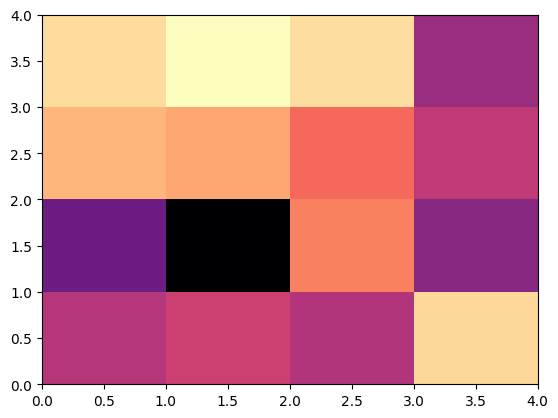

In [ ]:
# MRKV + dot/time + dot(prueba)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

class mrkv():
    def Data(self,size):
        self.size = size
        self.j = np.random.randn(self.size,self.size).round(4)
        dt = {}
        for i in range(self.size):
            dt[f'U{i+1}'] = self.j[i]
        idx = []
        for i in range(self.size):
            idx.append(f'W{i+1}')
        df = pd.DataFrame(data=dt,index=idx)
        col = {}
        self.dtp = np.zeros((self.size,self.size))
        for i in range(self.size):
            col[f'V{i+1}'] = self.dtp[i]
        
        self.pad = pd.DataFrame(data=self.dtp, index=idx)

        fig, ax = plt.subplots()
        k = ax.pcolormesh(df,cmap='magma')
        return df
    def Dot(self,data,time):
        self.time = time
        self.data = data
        for i in range(self.time):
            self.d = np.dot(self.j,self.data)
            self.pad.update(self.d)
        return self.pad
        
k  = np.random.randint(9,size=(4,4))
print(k)
m = np.random.randn(4,4).round(4)
j = mrkv()
j.Data(4)


def dot(pad,data,time):
    l = np.dot(pad,data)
    s = np.zeros(len(data))
    for i in l:
        for j in range(len(i)):
            s[j] = s[j] + i[j]   
    return s
f = dot(pad=k,data=m,time=4)
dt = []
h = {'W':dt}
for i in range(len(m)):
    dt.append(f'U{i+1}')

df = pd.DataFrame(f,index=dt,columns = h)
print(df)

In [ ]:
# Convolutional Layers + Kernels
import numpy as np
class Conv:
    def Kernel(size:list=[3,3],type:str=None):
        if size == [3,3]:
            size = 3
        elif size == [5,5]:
            size = 5
        if type == 'E_H':
            k = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        elif type == 'E_V':
            k = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        elif type == 'Sobel':
            k = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        elif type == 'Gaussian':
            k = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
        elif type == 'Corner':
            k = np.array([[-1,0,1],[0,0,0],[1,0,-1]])
        elif type == 'Identity':
            k = np.array([[0,0,0],[0,1,0],[0,0,0]])
        elif type == 'Sharpen':
            k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
        elif type == 'Laplacian':
            k = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
        elif type == 'Blur':
            k = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9
        elif type == 'Median':
            k = np.array([[0,1,0],[1,1,1],[0,1,0]])
        else:
            raise ValueError("Unsupported kernel type.")
        return k

    def Conv2d(image, kernel, stride=1, padding=0):
        if padding > 0:
            image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        
        kernel_height, kernel_width = kernel.shape
        output_height = ((image.shape[0] - kernel_height) // stride) + 1
        output_width  = ((image.shape[1] - kernel_width) // stride) + 1

        output = np.zeros((output_height, output_width))

        for i in range(0, output_height):
            for j in range(0, output_width):
                region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
                output[i, j] = np.sum(region * kernel)
        return output
    def Agrument(image, kernel, stride=1, padding=0, mode=None):
        if mode == 'max':
            if padding > 0:
                image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        
            kernel_height, kernel_width = kernel.shape
            output_height = ((image.shape[0] - kernel_height) // stride) + 1
            output_width  = ((image.shape[1] - kernel_width) // stride) + 1

            output = np.zeros((output_height, output_width))

            for i in range(0, output_height):
                for j in range(0, output_width):
                    region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
                    output[i, j] = np.max(region * kernel)
        elif mode == 'avg':
            if padding > 0:
                image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        
            kernel_height, kernel_width = kernel.shape
            output_height = ((image.shape[0] - kernel_height) // stride) + 1
            output_width  = ((image.shape[1] - kernel_width) // stride) + 1

            output = np.zeros((output_height, output_width))

            for i in range(0, output_height):
                for j in range(0, output_width):
                    region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
                    output[i, j] = np.mean(region * kernel)
        else:
            raise ValueError("Unsupported mode. Use 'max' or 'avg'.")
        return output
    def relu(self, x):
        return np.maximum(0, x)
    def FullyConnected(self, input_data, weights, bias):
        output = np.dot(input_data, weights) + bias
        return self.relu(output)





array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])